In [4]:
import matplotlib.pyplot as plt
import numpy as np

def jacobian(k, gamma, beta, N, z, phi):
    J11 = 0
    J12 = 2 * beta
    J13 = 0

    J21 = (2 * k * N / (N ** 2 - z ** 2) ** 0.5) * np.sin(phi) - 2 * beta
    J22 = - (2 * k * z / (N ** 2 - z ** 2) ** 0.5) * np.sin(phi)
    J23 = 2 * k * (N ** 2 - z ** 2) ** 0.5 * np.cos(phi)

    J31 = (2 * k * N * z / (N ** 2 - z ** 2) ** 1.5) * np.cos(phi) + 8 * gamma * z * (N + 2) / ((N + 2) ** 2 - z ** 2) ** 2
    J32 = (2 * k * N ** 2 / (N ** 2 - z ** 2) ** 1.5) * np.cos(phi) + 4 * gamma * ((N + 2) ** 2 + z ** 2) / ((N + 2) ** 2 - z ** 2) ** 2
    J33 = (2 * k * z / np.sqrt(N ** 2 - z ** 2)) * np.sin(phi)

    J = np.array([
        [J11, J12, J13],
        [J21, J22, J23],
        [J31, J32, J33]
    ])
    return J

def EOM(k, gamma, beta, N, z, phi):
    dz = 2 * k * np.sqrt(N ** 2 - z ** 2) * np.sin(phi) - 2 * beta * N
    dphi = - ((2 * k * z) / (np.sqrt(N ** 2 - z ** 2))) * np.cos(phi) + ((4 * gamma * z) / ((N + 2) ** 2 - z ** 2))
    return np.array([dz, dphi])

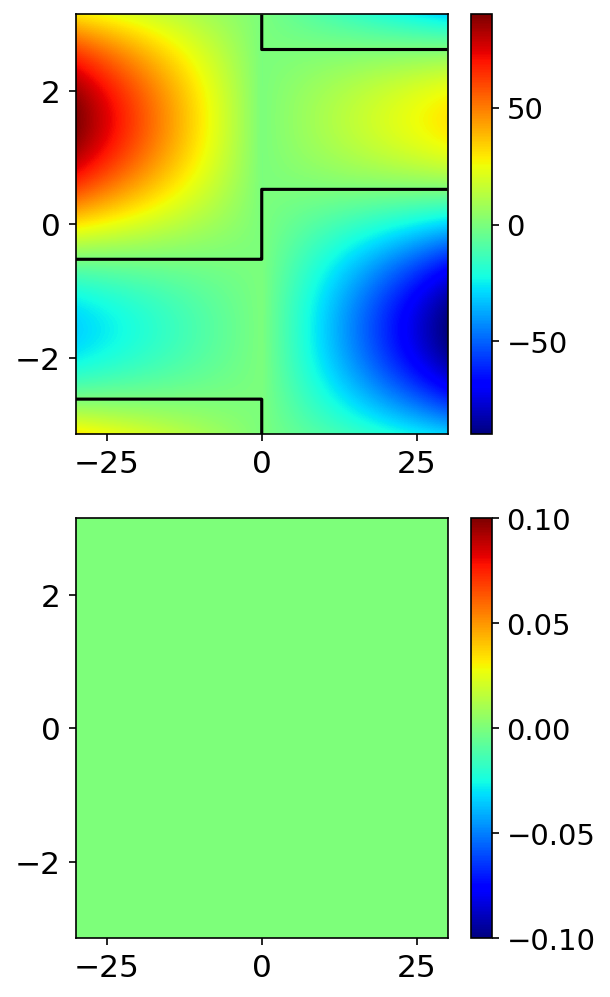

In [11]:
gamma = 10.0
k = 1.0
beta = 0.5
delta = 0.0

n = np.arange(-30, 30, 0.05) #
phi = np.arange(-np.pi, np.pi, 0.01)#n * np.pi
N, PHI = np.meshgrid(n, phi)

F = EOM(k, gamma, beta, N, 0, PHI)

fig, ax = plt.subplots(2, 1, figsize=(4, 8), dpi=150)

pcm = ax[0].pcolormesh(n, phi, F[0], cmap="jet", shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
ax[0].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[0].contour(N, PHI, F[0], levels=[0], colors='k')

pcm = ax[1].pcolormesh(n, phi, F[1], cmap="jet", shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
ax[1].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)

